In [1]:
!pip install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 107 kB 15.5 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=7b31a01922589d6f1cb0420712a0cac28e4aa80858ca8b2e9ef3a35fe91c6f82
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import tflearn.datasets.oxflower17 as oxflower17
from sklearn.model_selection import train_test_split

In [6]:
np.random.seed(1000)

In [7]:
X , y = oxflower17.load_data(one_hot = True)

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


# Feature shape

In [8]:
X.shape

(1360, 224, 224, 3)

# Output Shape

In [9]:
y.shape

(1360, 17)

# First Image Shape

In [10]:
X[0].shape

(224, 224, 3)

# Show First Image

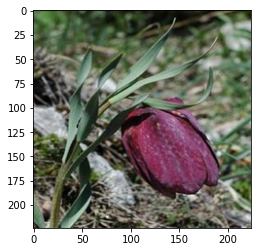

In [11]:
plt.imshow(X[0])

In [12]:
print(y[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [33]:
train_set , test_set = train_test_split(X,test_size = 0.2)

# AlexNet Architecture

In [25]:
modelAlexNet = tf.keras.models.Sequential()

# 1st Convolutional Network
modelAlexNet.add(tf.keras.layers.Conv2D(filters = 96, input_shape = (224,224,3),kernel_size = (11,11),strides = (4,4),padding = 'valid'))
modelAlexNet.add(tf.keras.layers.Activation('relu'))

# Pooling Layer
modelAlexNet.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides = (2,2),padding = 'valid'))

#Batch Normalization before passing it to the next layer
modelAlexNet.add(tf.keras.layers.BatchNormalization())

#*************************************************************************************************************************
# 2nd Convolutional Layer
modelAlexNet.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = (11,11),strides = (1,1),padding = 'valid'))
modelAlexNet.add(tf.keras.layers.Activation('relu'))

# Pooling Layer
modelAlexNet.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides = (2,2),padding = 'valid'))

#Batch Normalization
modelAlexNet.add(tf.keras.layers.BatchNormalization())

#*************************************************************************************************************************
# 3rd Convolutional Layer
modelAlexNet.add(tf.keras.layers.Conv2D(filters = 384, kernel_size = (3,3),strides = (1,1),padding = 'valid'))
modelAlexNet.add(tf.keras.layers.Activation('relu'))

#Batch Normalization
modelAlexNet.add(tf.keras.layers.BatchNormalization())

#*************************************************************************************************************************
#4th Convolutional Layer
modelAlexNet.add(tf.keras.layers.Conv2D(filters = 384, kernel_size = (3,3),strides = (1,1),padding = 'valid'))
modelAlexNet.add(tf.keras.layers.Activation('relu'))

#Batch Normalization
modelAlexNet.add(tf.keras.layers.BatchNormalization())

#*************************************************************************************************************************
#5th Convolutional Layer
modelAlexNet.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3),strides = (1,1),padding = 'valid'))
modelAlexNet.add(tf.keras.layers.Activation('relu'))

#Pooling
modelAlexNet.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides = (2,2),padding='valid'))

#Batch Normalization
modelAlexNet.add(tf.keras.layers.BatchNormalization())

#*************************************************************************************************************************
#Passing it to Dense Layer
modelAlexNet.add(tf.keras.layers.Flatten())
modelAlexNet.add(tf.keras.layers.Activation('relu'))

#Add DropOut
modelAlexNet.add(tf.keras.layers.Dropout(0.4))
modelAlexNet.add(tf.keras.layers.BatchNormalization())

#*************************************************************************************************************************
# 2nd Dense Layer
modelAlexNet.add(tf.keras.layers.Dense(4096))
modelAlexNet.add(tf.keras.layers.Activation('relu'))
#Add DropOut
modelAlexNet.add(tf.keras.layers.Dropout(0.4))
modelAlexNet.add(tf.keras.layers.BatchNormalization())

#*************************************************************************************************************************
# 3rd Dense Layer
modelAlexNet.add(tf.keras.layers.Dense(1000))
modelAlexNet.add(tf.keras.layers.Activation('relu'))
#Add DropOut
modelAlexNet.add(tf.keras.layers.Dropout(0.4))
modelAlexNet.add(tf.keras.layers.BatchNormalization())

#*************************************************************************************************************************
#Output Layer
modelAlexNet.add(tf.keras.layers.Dense(17))
modelAlexNet.add(tf.keras.layers.Activation('softmax'))

In [26]:
modelAlexNet.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 activation_28 (Activation)  (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_20 (Bat  (None, 27, 27, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_23 (Conv2D)          (None, 17, 17, 256)       2973952   
                                                                 
 activation_29 (Activation)  (None, 17, 17, 256)      

In [27]:
modelAlexNet.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [28]:
modelAlexNet.fit(X,y,batch_size=64,epochs = 1,verbose=1,validation_split=0.2,shuffle=True)

Train on 1088 samples, validate on 272 samples
1088/1088 [==============================] - ETA: 0s - loss: 3.1335 - acc: 0.1967

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 163s 150ms/sample - loss: 3.1335 - acc: 0.1967 - val_loss: 33.8583 - val_acc: 0.0588
